In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1> Load and Clean Data </h1>

In [2]:
dataset = pd.read_excel('proj1Dataset.xlsx');
dataset.head()

,Weight,Horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


Text(0,0.5,'Horsepower')

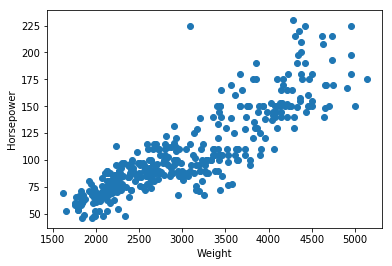

In [3]:
# Plot the Data
plt.scatter(dataset['Weight'],dataset['Horsepower'])
plt.xlabel('Weight')
plt.ylabel('Horsepower')

In [73]:
# Convert Data to Numpy Arrays
predictors = np.array(dataset['Weight'])
targets = np.array(dataset['Horsepower'])

In [74]:
# Clean Up Data: Ommiting Non Finite Values or missing data
# indices = np.argwhere(~np.isfinite(targets))
# targets[indices] = np.mean(targets[np.isfinite(targets)])

if(np.sum(~np.isfinite(targets))):
    clean_indices = np.argwhere(np.isfinite(targets))
    predictors = predictors[clean_indices]
    targets = targets[clean_indices]

# # Normalize Data
max_x = np.max(predictors)

predictors = predictors/max_x
targets = targets

In [75]:
# Design Matrix X
array_of_ones = np.ones(len(predictors)).reshape(len(predictors),1)
# predictors.shape
X = np.append(predictors.reshape(len(predictors),1),array_of_ones,axis=1)


In [76]:
# Design Matrix t
t = targets

<h1> Closed Form Solution </h1>

In [109]:
# Closed Form Predicted Values
predictions_closed_form = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),t)

In [110]:
x_mesh = np.linspace(1500,5500,10000)
predictions_closed_form[0] = predictions_closed_form[0]/max_x
y_closed_form = x_mesh*predictions_closed_form[0] + predictions_closed_form[1]

In [111]:
# Plot Closed Form Solution
# plt.scatter(dataset['Weight'],dataset['Horsepower'])
# # plt.scatter(predictors,targets)
# plt.plot(x_mesh,y_closed_form)
# plt.xlabel('Weight')
# plt.ylabel('Horsepower')
# plt.title('Closed Form Solution')
# plt.show()

<h1> Gradient Descent Solution </h1>

In [112]:
def calculate_output(w,X):
    return np.dot(w.T,X)
def cost_function(w,X,t):
    y = calculate_output(w,X)
    cost = np.sum(np.power(y - t,2))
    return cost

In [113]:
def calculate_gradient(w,X,t):
    y = calculate_output(w,X)
#     dw1 = np.sum(-2*np.dot(X,(t-y).T))
#     dw0 = np.sum(-2*(t-y).T)
#     dw = [dw1, dw0]
    dw = 2*np.dot(np.dot(w.T,X),X.T) - 2*np.dot(t,X.T)
    return np.array(dw).reshape(2,1)

In [114]:
def train(w,X,t,epochs,learning_rate,printCost=False,plotCost=False):
    costArr = []
    for i in range(epochs):
        costArr.append(cost_function(w,X,t))
        if printCost:
            print('Cost: ' + str(costArr[i]))
        grad = calculate_gradient(w,X2,t2)
        w -= learning_rate*grad
    if plotCost:
        plt.plot(list(range(epochs)),costArr)
        

In [115]:
# print(w.shape)
# X.shape
# Initialze Random Weigths and other parameters
w = np.random.randn(2,1)
learning_rate = 1e-3
epochs = 5000
X2 = X.T # To insure correct dimensions
t2 = t.T # To insure correct dimensions

# Train the Model
train(w,X2,t2,epochs,learning_rate,0,0)
w[0] = w[0]/max_x
# np.array([1/max_x,1])


In [116]:
y = x_mesh*w[0] + w[1]
# plt.plot(x_mesh,y)
# plt.scatter(dataset['Weight'],dataset['Horsepower'])
# plt.scatter(predictors,targets)
# plt.xlabel('Weight')
# plt.ylabel('Horsepower')
# plt.title('Gradient Decent Solution')

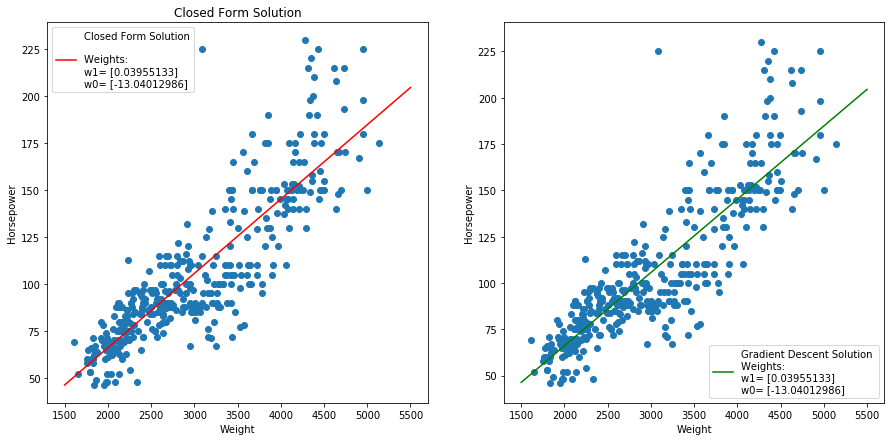

In [127]:
plt.subplots(2,1,figsize=(15,7))
plt.subplot(121)
plt.scatter(dataset['Weight'],dataset['Horsepower'])
# plt.scatter(predictors,targets,marker='x')
plt.plot(x_mesh,y_closed_form,color='r')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Closed Form Solution')
plt.legend(['Closed Form Solution\n' + '\nWeights: \nw1= ' + str(predictions_closed_form[0])+ '\nw0= ' + str(predictions_closed_form[1])])
# plt.show()
plt.subplot(122)
plt.plot(x_mesh,y,color='g')
plt.scatter(dataset['Weight'],dataset['Horsepower'])
# plt.scatter(predictors,targets,marker='x')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.legend(['Gradient Descent Solution' + ' \nWeights: \nw1= ' + str(w[0]) + '\nw0= ' + str(w[1])])

# print('Closed Form Weights: \n' + str(predictions_closed_form))
# print('Gradient Decent Weights: \n' + str(w))

plt.show()